In [71]:
#median_filter_example

In [72]:
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def convert_rgb_to_gray_level_01(im_1):#rgb'yi gray'e dönüştür.
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2
def get_distance(v,w=[1/3,1/3,1/3]):#norm'unu getir.
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d

In [74]:
def  get_default_mask_for_mean():#1/9 olan bir tane 3'e 3'lük matris oluştur.
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

In [75]:
def apply_mask(part_of_image):#gönderileni 1'e 9'lul elemanlarla çarp.
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

In [76]:
block_1=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9 #3'e 3'lük matris, hepsi 1/9 olarak gelecektir.
#9'a bölme nedenimiz->çünkü 9 tane sayı var, ortalamasını bulmak için.
block_1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [77]:
block_1=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)
block_1

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [78]:
block_1=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
sum(block_1)#sütun sütun toplayacak.

array([0.33333333, 0.33333333, 0.33333333])

In [79]:
block_1=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
sum(sum(block_1))

1.0

In [80]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

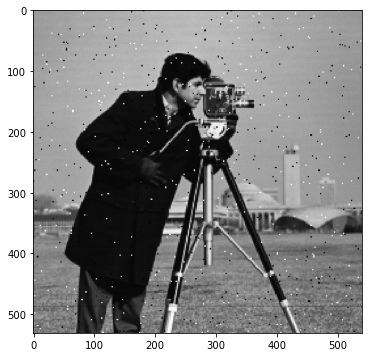

In [81]:
import matplotlib.image as mpimg
im_1=mpimg.imread('deneme_2.jpg')
im_2=convert_rgb_to_gray_level_01(im_1)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
plt.show

In [82]:
def get_median_for_55(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
def get_median(poi):#3'e 3'lük bir blok için
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]

In [83]:
#3'e göre biraz daha uzaktaki komşularıma bakarak benim değerimi değiştir diyeceksiniz.
def get_mean_filter_for_55(im_1):#5'e 5'lik bir mask yapıyor.
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im_1[i-2:i+3,j-2:j+3]
            im_2[i,j]=get_median_for_55(poi)
    return im_2         

In [84]:
def get_mean_filter(im_1):#3'e 3'lük bir mask yapıyor.
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=im_1[i-1:i+2,j-1:j+2]
            im_2[i,j]=get_median(poi)
    return im_2 

In [85]:
i,j=10,10
poi_100=im_1[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5, 3)

In [86]:
i,j=10,10
poi_100=im_2[i-2:i+3,j-2:j+3]
poi_100.shape

(5, 5)

In [87]:
im_55=get_mean_filter_for_55(im_2)

In [88]:
im_555=get_mean_filter(im_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c65f678b80>,
 <matplotlib.image.AxesImage at 0x1c65f6daa90>)

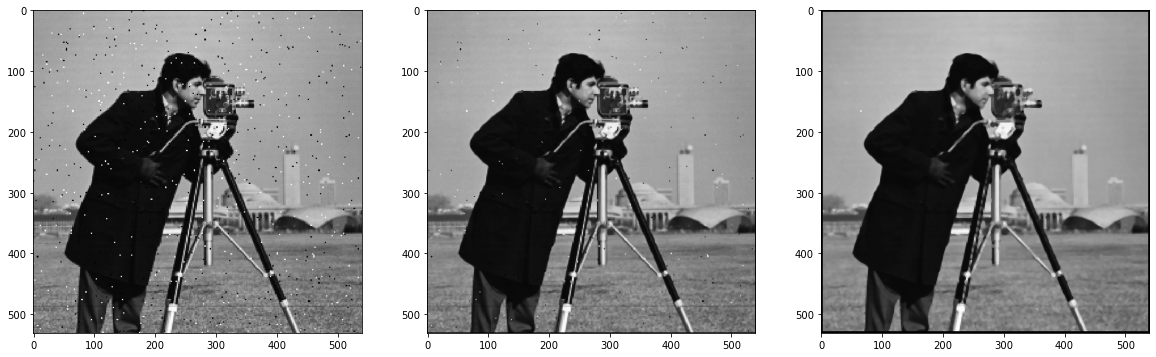

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,3,2),plt.imshow(im_555,cmap='gray')#ayrıntılar biraz görünüyor.(3'lük)
plt.subplot(1,3,3),plt.imshow(im_55,cmap='gray')#ayrıntılar gitti.(5'lik)